In [1]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import collections
from operator import itemgetter
import geopandas
from matplotlib.colors import ListedColormap
import sys
import gc
import itertools
import pylab
from collections import Counter

In [2]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)   
excel_list.sort()

In [3]:
def dates(s):
    year = s[:2]
    month = s[2:4]
    return "20" + year + "-" + month + "-" + "01"
same_city = {"DABOLIM":"GOA","Jharsuguda":"JHARSUGUDA","KADAPA":"CUDDAPAH","PONDICHERRY":"PUDUCHERRY", "COCHIN":"KOCHI"
}

In [4]:

# Creating networks and stroing them
coordinates = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0,index_col= 0)
print(coordinates)

max_weight = 0
min_weight = 10000000000
graphs = []

passengers1 = []  # records number of total passengers(month wise)
lbls = []
lbls2 = []
tt = 0


monthstogether = 1
passengers = []    # records number of total passengens for given combined months


while (tt < len(excel_list)):
    i = excel_list[tt]
    lbls2.append(dates(i))
    path = "Raw_Data/"+i
    lbls.append(i[:-4])
    cities = {}
    G = nx.DiGraph()
    xmonths = Counter()
    
    for jj in range(tt,min(tt+monthstogether,len(excel_list))):
        
        path = path = "Raw_Data/" + excel_list[jj]
        excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
        

        
        for i in range(1,len(excel)+1):
            city1 = excel["city1"][i]
            city2 = excel["city2"][i]
            
            
            if city1 in same_city:
                city1 = same_city[city1]
        
            if city2 in same_city:
                city2 = same_city[city2]
            cities[city1] = (coordinates["Longitude"][city1],coordinates["Latitude"][city1])
            cities[city2] = (coordinates["Longitude"][city2],coordinates["Latitude"][city2])
            
            citypair1 = (city1,city2)
            citypair2 = (city2,city1)
            
            xmonths[citypair1] += excel["to"][i]
            xmonths[citypair2] += excel["from"][i]

            if xmonths[citypair2] == 0:
                xmonths.pop(citypair2)
            if xmonths[citypair1] == 0:
                xmonths.pop(citypair1) 
        passengers1.append(sum(excel["to"]) + sum(excel["from"]))
            
            
    for i in cities:
        G.add_node(i, pos= cities[i])


    print(path)
    for jj in xmonths:
        G.add_edge(jj[0],jj[1],weight=xmonths[jj])
        max_weight = max(max_weight,xmonths[jj])
        min_weight = min(min_weight, xmonths[jj])
    print(excel)
    graphs.append(G)
    passengers.append(sum(list(xmonths.values())))
    tt += monthstogether

graphslen = len(graphs)
#print(cities)

               Latitude  Longitude
Cities                            
ADAMPUR          31.430     75.750
AGARTALA         23.887     91.240
AGATTI ISLAND    10.824     72.176
AGRA             27.156     77.961
AHMEDABAD        23.077     72.635
...                 ...        ...
VADODARA         22.336     73.226
VARANASI         25.452     82.859
VIDYANAGAR       15.170     76.620
VIJAYAWADA       16.530     80.797
VISAKHAPATNAM    17.721     83.224

[119 rows x 2 columns]
Raw_Data/1505.csv
             city1       city2       to     from
SNo                                             
1    AGATTI ISLAND       KOCHI    482.0    787.0
2        AHMEDABAD   BENGALURU  15846.0  13112.0
3        AHMEDABAD      BHOPAL   1020.0    720.0
4        AHMEDABAD     CHENNAI  16090.0  14762.0
5        AHMEDABAD  COIMBATORE    946.0   1204.0
..             ...         ...      ...      ...
280       VADODARA   BENGALURU    513.0      0.0
281       VADODARA     CHENNAI   1106.0   1012.0
282       VAD

Raw_Data/1610.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI    384    809
2         AGARTALA  VISAKHAPATNAM     39      0
3    AGATTI ISLAND          KOCHI   1473      0
4             AGRA          DELHI      0     66
5             AGRA      KHAJURAHO    254      0
..             ...            ...    ...    ...
314       VADODARA      HYDERABAD    376    351
315       VADODARA        KOLKATA    637      0
316       VADODARA        LUCKNOW    179    105
317       VADODARA         MUMBAI  22907  19990
318     VIJAYAWADA  VISAKHAPATNAM    888   2554

[318 rows x 4 columns]
Raw_Data/1611.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI    723   1215
2         AGARTALA  VISAKHAPATNAM     63      0
3    AGATTI ISLAND          KOCHI    777    828
4             AGRA          DELHI      0     28
5             AGRA      KHAJ

Raw_Data/1802.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI   3316   4470
2         AGARTALA     PORT BLAIR      0      8
3         AGARTALA           PUNE    119      0
4         AGARTALA  VISAKHAPATNAM     46      0
5    AGATTI ISLAND          KOCHI    966   1173
..             ...            ...    ...    ...
444       VADODARA        KOLKATA    162    130
445       VADODARA        LUCKNOW      0    207
446       VADODARA      MANGALORE    134      0
447       VADODARA         MUMBAI  25184  23893
448     VIJAYAWADA  VISAKHAPATNAM   3488   3365

[448 rows x 4 columns]
Raw_Data/1803.csv
             city1          city2    to  from
SNo                                          
1             AGRA          DELHI     0    46
2             AGRA      KHAJURAHO   332     0
3             AGRA       VARANASI     0   909
4    AGATTI ISLAND          KOCHI  1104  1205
5           AIZAWL      AHMEDABAD    28 

Raw_Data/1903.csv
             city1          city2     to   from
SNo                                            
1          ADAMPUR          DELHI   2333   2303
2         AGARTALA        CHENNAI   1392   1733
3         AGARTALA         JAIPUR      0    110
4         AGARTALA  VISAKHAPATNAM    151      0
5    AGATTI ISLAND      BENGALURU     86     62
..             ...            ...    ...    ...
510       VADODARA          KOCHI     24      0
511       VADODARA      MANGALORE    109      0
512       VADODARA         MUMBAI  15634  13720
513       VADODARA     PORT BLAIR      2      0
514     VIJAYAWADA  VISAKHAPATNAM   2409   2176

[514 rows x 4 columns]
Raw_Data/1904.csv
             city1          city2     to   from
SNo                                            
1          ADAMPUR          DELHI   2268   2257
2         AGARTALA        CHENNAI   1932   1974
3    AGATTI ISLAND      BENGALURU     60     65
4    AGATTI ISLAND          KOCHI   1113   1298
5             AGRA          

Raw_Data/2006.csv
                        city1          city2    to   from
SNo                                                      
1                    AGARTALA      BENGALURU   401    390
2                    AGARTALA          DELHI   150    261
3                    AGARTALA       GUWAHATI    40   1091
4                    AGARTALA        KOLKATA  9803  12288
5                        AGRA         JAIPUR   111     90
..                        ...            ...   ...    ...
317                     SURAT     VIJAYAWADA     0      0
318                     SURAT  VISAKHAPATNAM     0      0
319                  TIRUPATI  VISAKHAPATNAM     7      0
320                TRIVANDRUM     VIJAYAWADA    26      0
321  BIDAR AIRPORT, KARNATAKA      BENGALURU   754    727

[321 rows x 4 columns]
Raw_Data/2007.csv
        city1          city2    to  from
SNo                                     
1    AGARTALA      BENGALURU   532  1512
2    AGARTALA          DELHI  2726  3876
3    AGARTALA       GU

In [5]:
lbls1 = []
month = {"01":"Jan", "02":"Feb", "03":"March", "04":"April", "05":"May", "06":"June", "07":"July", "08":"Aug", 
        "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
for e in lbls:
    lbls1.append(month[e[2:]]+e[:2])

AGATTI ISLAND
KOCHI
AHMEDABAD
BENGALURU
BHOPAL
CHENNAI
COIMBATORE
DELHI
DIBRUGARH
GOA
GUWAHATI
HYDERABAD
IMPHAL
INDORE
JAIPUR
KOLKATA
LUCKNOW
MUMBAI
NAGPUR
PUNE
AIZAWL
AMRITSAR
SRINAGAR
BAGDOGRA
BELGAUM
JABALPUR
AGARTALA
CHANDIGARH
DEHRA DUN
HUBLI
JODHPUR
JORHAT
KOZHIKODE
MANGALORE
PATNA
PUDUCHERRY
RAIPUR
RAJAHMUNDRY
RAJKOT
RANCHI
TRIVANDRUM
VARANASI
VIJAYAWADA
VISAKHAPATNAM
BHAVNAGAR
BHUBANESWAR
PORT BLAIR
BHUJ
TIRUCHIRAPALLY
TUTICORIN
ALLAHABAD
AURANGABAD
DHARAMSALA
DIMAPUR
GAYA
GWALIOR
JAMMU
KHAJURAHO
KULLU
LEH
PANTNAGAR
SURAT
TIRUPATI
UDAIPUR
DIU
PORBANDAR
LILABARI
SILCHAR
MADURAI
DURGAPUR
SHILLONG
JAMNAGAR
TEZPUR
VADODARA

CUDDAPAH

AGRA


MYSORE
GORAKHPUR















BHATINDA
KANPUR




SIMLA
NANDED



KANDLA


BIKANER
LUDHIANA

JAISALMER
SHIRDI
VIDYANAGAR


JALGAON
NASIK


MUNDRA

SALEM

PATHANKOT
KOLHAPUR

ADAMPUR
PASIGHAT

JAGDALPUR




AJMER
GANGTOK


KANNUR

PITHORAGARH
PAKYONG


JHARSUGUDA







GHAZIABAD

KALABURAGI, KARNATAKA



BIDAR AIRPORT, KARNATAKA









DARBH

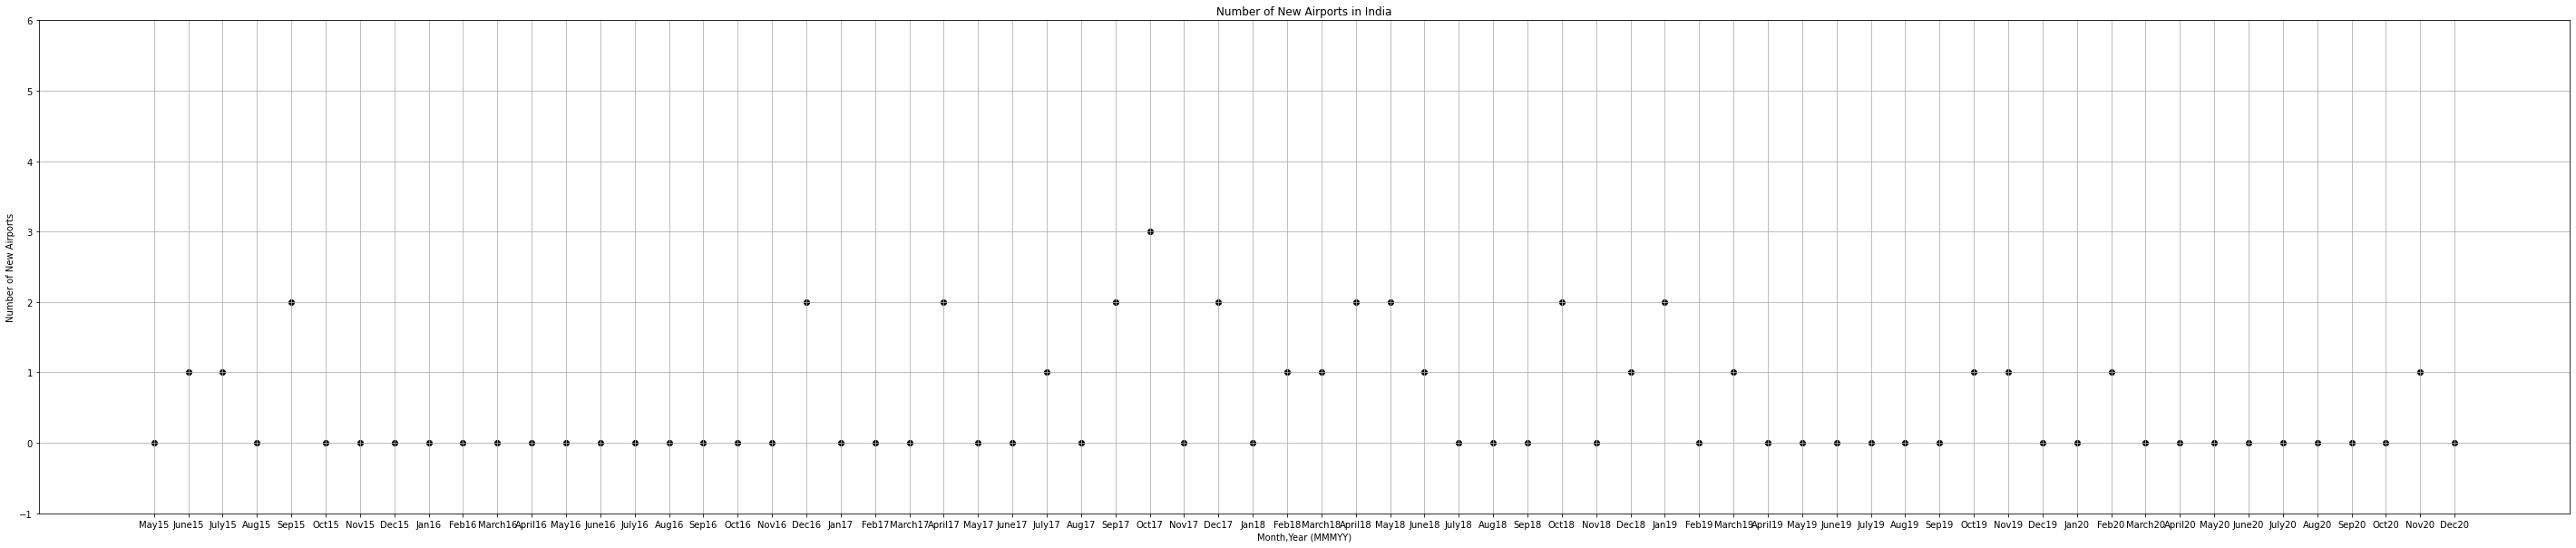

In [6]:
nnodes = []
airpor = {} 
new_airports = []
for i in range(len(graphs)):
    airports_new = []
    temp = 0
    for j in graphs[i].nodes():
        if j not in airpor:
            airpor[j]=  1
            temp += 1
            print(j)
            airports_new.append(j)
    print()
    new_airports.append(airports_new)
    nnodes.append(temp)
nnodes[0] = 0
plt.scatter(lbls1, nnodes, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of New Airports")
plt.title("Number of New Airports in India")
plt.grid(True)
plt.ylim(-1,6)
figure = plt.gcf()
figure.set_size_inches(50, 10)
plt.savefig('Output_Files/matplotlib/new/newnodes')
plt.show()
plt.clf()
plt.close()

In [7]:
length = max(map(len, new_airports))
y=np.array([xi+[None]*(length-len(xi)) for xi in new_airports])
pd.DataFrame(y)[:25]

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,AGATTI ISLAND,KOCHI,AHMEDABAD,BENGALURU,BHOPAL,CHENNAI,COIMBATORE,DELHI,DIBRUGARH,GOA,...,DIU,PORBANDAR,LILABARI,SILCHAR,MADURAI,DURGAPUR,SHILLONG,JAMNAGAR,TEZPUR,VADODARA
1,CUDDAPAH,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,AGRA,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,MYSORE,GORAKHPUR,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [8]:
def analysis(place):
    edges = {}
    for i in range(len(graphs)-9):
        g = graphs[i]
        in_e = g.in_edges(place)
        out_e = g.out_edges(place)
        edges[lbls1[i]] = []
        for j in in_e:
            if(j[0] not in edges[lbls1[i]]):
                edges[lbls1[i]].append(j[0])
        for j in out_e:
            if(j[1] not in edges[lbls1[i]]):
                edges[lbls1[i]].append(j[1])
    print("Increase in edges:",len(edges["March20"]) - len(edges["May15"]))
    return len(edges["March20"]) - len(edges["May15"])
#     plt.figure(figsize = (50, 15)) 
#     plt.xticks(range(len(graphs)-9),lbls1[:-9])
#     plt.plot([len(edges[i]) for i in edges])
#     plt.show()
    

In [9]:
def analysis_degree(place):
    degree = []
    for i in range(len(graphs)-9):
        g = graphs[i]
        deg = g.degree(place)
        if(type(deg)==int):
            degree.append(deg)
        else:
            degree.append(0)
    print("Increase in degree:",degree[-1]-degree[0])
    plt.figure(figsize = (50, 15)) 
    plt.title(place)
    plt.xticks(range(len(graphs)-9),lbls1[:-9])
    plt.plot(degree)
    

In [10]:
nodes = graphs[0].nodes
jubbu = {}
for i in nodes:
    print(i)
    jubbu[i]=analysis(i)
    print()

AGATTI ISLAND
Increase in edges: 2

KOCHI
Increase in edges: 9

AHMEDABAD
Increase in edges: 23

BENGALURU
Increase in edges: 19

BHOPAL
Increase in edges: 7

CHENNAI
Increase in edges: 14

COIMBATORE
Increase in edges: 9

DELHI
Increase in edges: 16

DIBRUGARH
Increase in edges: 0

GOA
Increase in edges: 14

GUWAHATI
Increase in edges: 10

HYDERABAD
Increase in edges: 29

IMPHAL
Increase in edges: 2

INDORE
Increase in edges: 2

JAIPUR
Increase in edges: 11

KOLKATA
Increase in edges: 12

LUCKNOW
Increase in edges: 8

MUMBAI
Increase in edges: 15

NAGPUR
Increase in edges: 4

PUNE
Increase in edges: 10

AIZAWL
Increase in edges: 1

AMRITSAR
Increase in edges: 10

SRINAGAR
Increase in edges: 2

BAGDOGRA
Increase in edges: 9

BELGAUM
Increase in edges: 8

JABALPUR
Increase in edges: 2

AGARTALA
Increase in edges: 5

CHANDIGARH
Increase in edges: 15

DEHRA DUN
Increase in edges: 9

HUBLI
Increase in edges: 9

JODHPUR
Increase in edges: 4

JORHAT
Increase in edges: 0

KOZHIKODE
Increase i

In [11]:
print(graphs[0].degree(["AHMEDABAD"]))
print(graphs[-10].degree(["AHMEDABAD"]))

[('AHMEDABAD', 35)]
[('AHMEDABAD', 79)]


In [12]:
jubbu2 =  sorted(jubbu.items(), key=lambda item: item[1], reverse=True)

In [13]:
jubbu3 = []
for i in jubbu2:
    lubbu = []
    lubbu.append(i[0])
    lubbu.append(i[1])
    lubbu.append(graphs[0].degree(i[0]))
    lubbu.append(graphs[-10].degree(i[0]))
    jubbu3.append(lubbu)
jubbu3 = np.array(jubbu3)
bubbu = pd.DataFrame(jubbu3, columns=["city", "change", "starting degree", "ending degree"])

In [14]:
bubbu

,city,change,starting degree,ending degree
0,HYDERABAD,29,54,111
1,AHMEDABAD,23,35,79
2,BENGALURU,19,76,115
3,DELHI,16,107,140
4,MUMBAI,15,92,120
...,...,...,...,...
69,SHILLONG,0,2,2
70,JAMNAGAR,0,2,2
71,TEZPUR,0,2,2
72,RAJKOT,-1,6,4


In [15]:
evolving_ports = {}
para = 10
for i in range(len(bubbu["city"]) ):
    if int(bubbu["change"][i]) >= para:
        evolving_ports[bubbu["city"][i]] = bubbu["change"][i]
print(evolving_ports)

{'HYDERABAD': '29', 'AHMEDABAD': '23', 'BENGALURU': '19', 'DELHI': '16', 'MUMBAI': '15', 'CHANDIGARH': '15', 'CHENNAI': '14', 'GOA': '14', 'PATNA': '13', 'SURAT': '13', 'KOLKATA': '12', 'UDAIPUR': '12', 'JAIPUR': '11', 'GUWAHATI': '10', 'PUNE': '10', 'AMRITSAR': '10'}


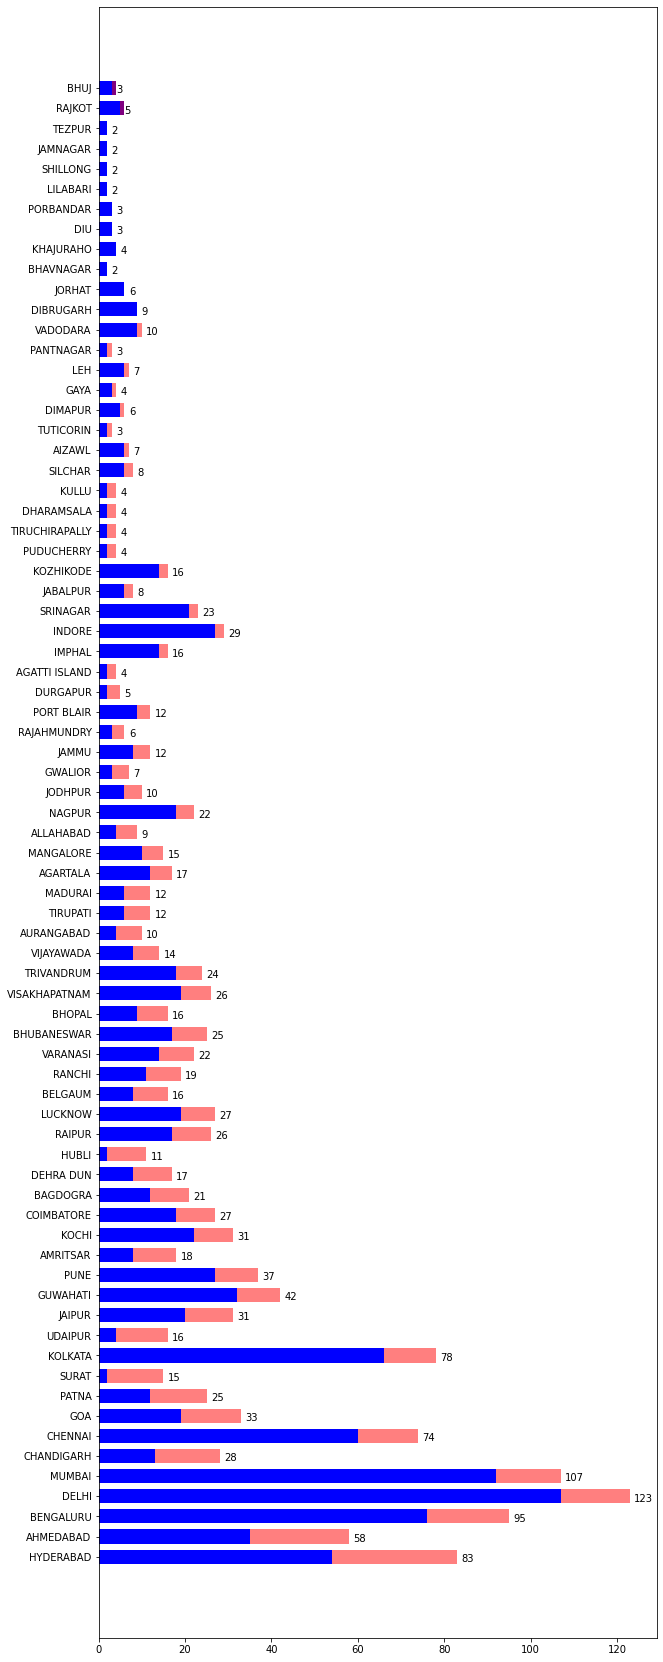

In [16]:

xlabel = np.array(bubbu.city)
x = np.arange(len(xlabel))
y2 = np.array(bubbu.change).astype(int)
y1 = np.array(bubbu["starting degree"]).astype(int)
  
# plot bars in stack manner
figure = plt.gcf()
figure.set_size_inches(10, 30)
plt.barh(x, y1,  color='b',align='center', height=0.7)
plt.barh(x, y2, left=y1, color='r', alpha = 0.5,align='center', height=0.7)
plt.yticks(x,xlabel)
for i in range(len(x)):
#     plt.text(x = y1[i]+1, y=x[i]-0.25, s = y1[i])
    plt.text(x = y2[i]+y1[i]+1, y=x[i]-0.25, s = y1[i]+y2[i])
plt.show()

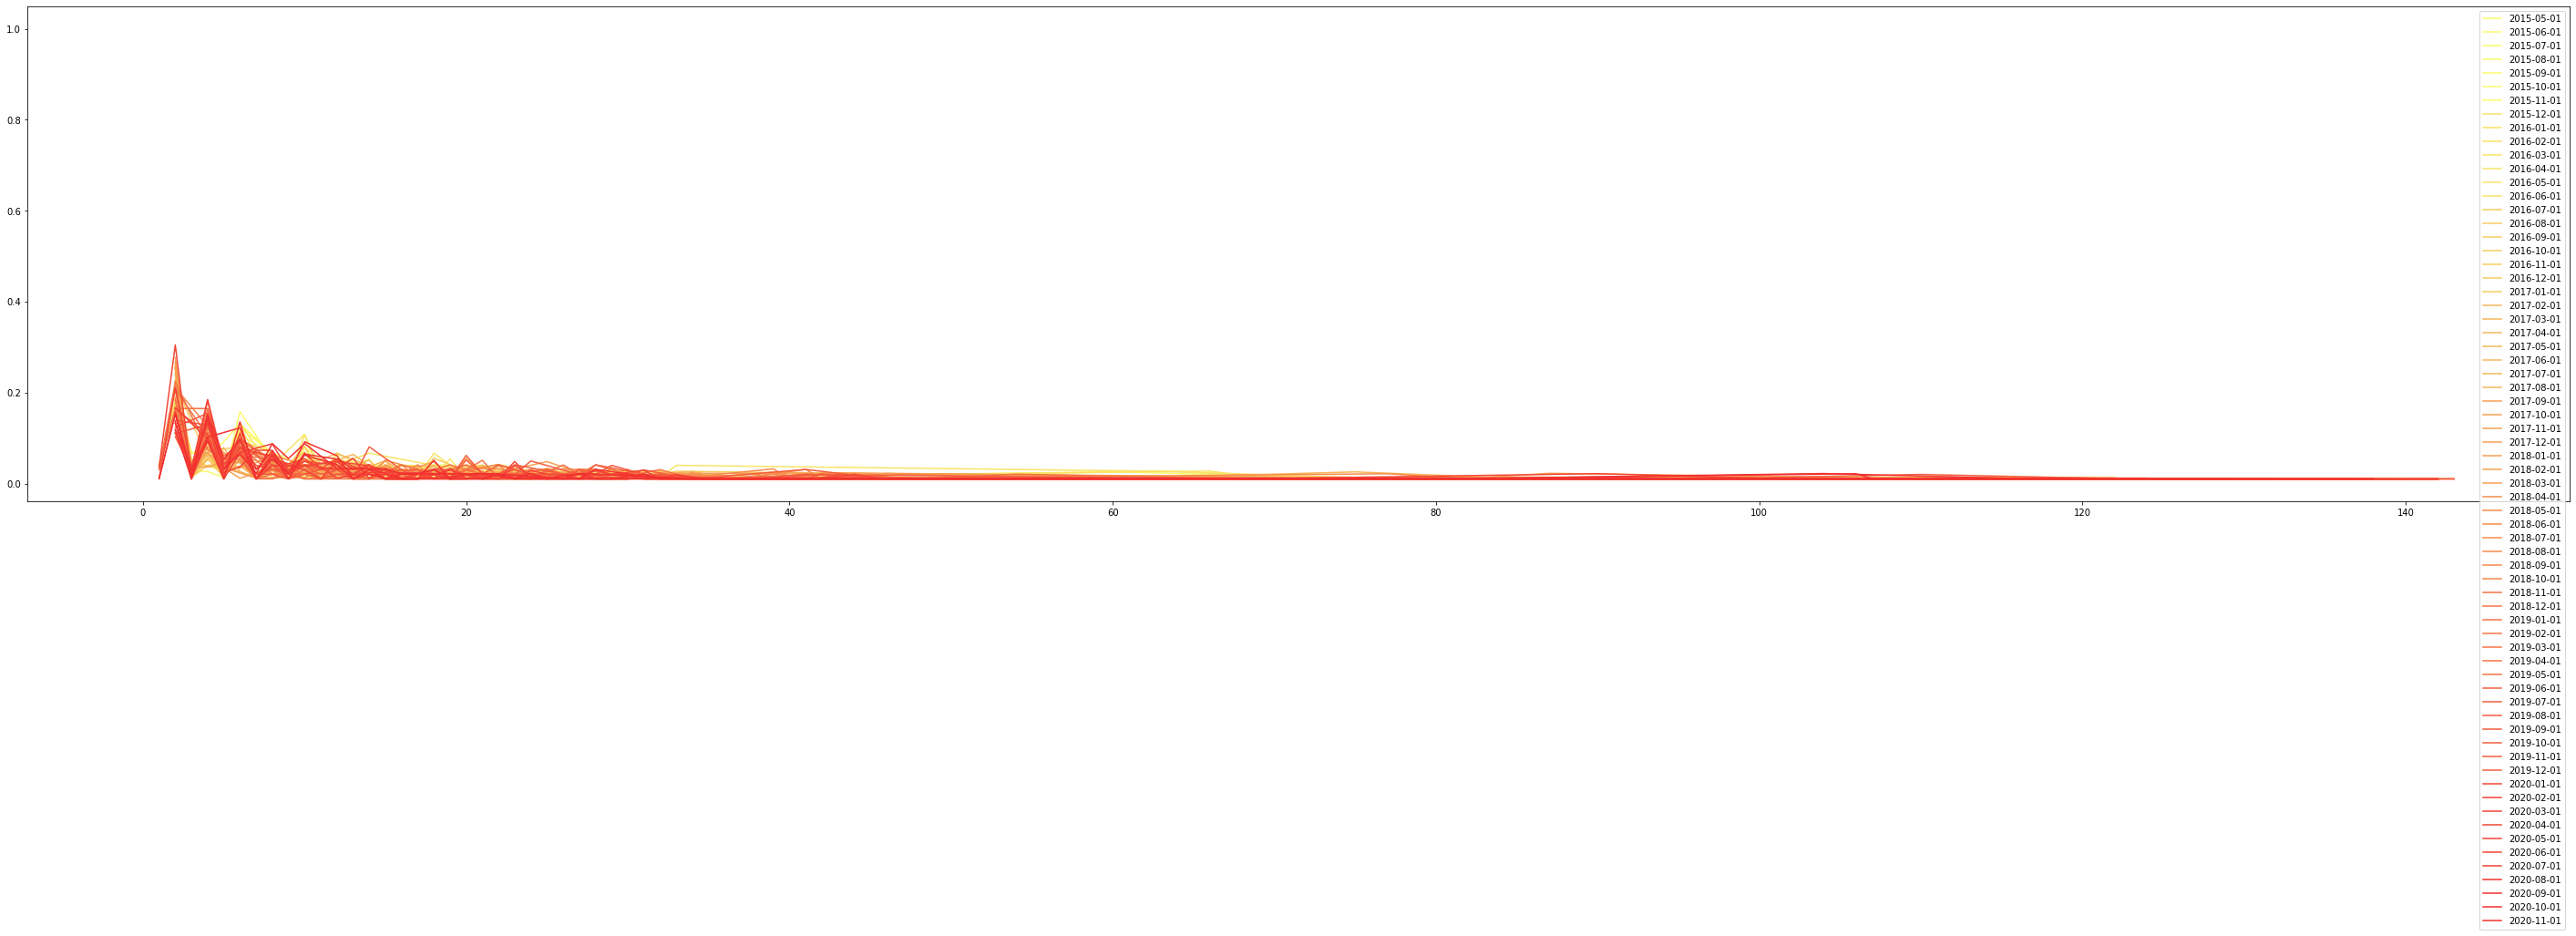

In [17]:
colormap = ["#fafa6e", "#f9e467","#f8cd60", "#f7b759", "#f6a052", "#f68a4c", "#f57345", "#f45d3e", "#f34637", "#f23030" ]
def plot_degree_dist(G,label,color):
    degrees = [G.degree(n) for n in G.nodes()]
    pusu = Counter(degrees)
    y = [pusu[i] for i in sorted(pusu)]
    mx = len(G.nodes())
    y = [i/mx for i in y]
    plt.plot([i for i in sorted(pusu)],y, label=label, color=color)
for i in range(len(graphs)-1):
    plot_degree_dist(graphs[i],
                     lbls2[i],
                     colormap[i//7])
figure = plt.gcf()
figure.set_size_inches(50, 10)
plt.legend()
plt.show()

In [18]:
print(len(graphs))

68


In [19]:
gra = 0
strength = Counter()
cityk = Counter()
for i in graphs[gra].degree:
    cityk[i[0]] = i[1]
for i in cityk:
    s = 0
    for j in cityk:
        if graphs[gra].get_edge_data(i,j) != None:
            s += graphs[gra][i][j]["weight"]
    strength[i] = s
clus_coeffw = Counter()
for i in cityk:
    ci = 0
    for j in cityk:
        for h in cityk:
            try:
                f = 1/(strength[i] *(cityk[i] - 1))
                wij = graphs[gra][i][j]["weight"] if graphs[gra][i][j]["weight"] != None else 0
                wih = graphs[gra][i][h]["weight"] if graphs[gra][i][h]["weight"] != None else 0
                if graphs[gra].has_edge(h,j):
                    ci += (wij + wih)/2
            except:
                #print("HAHA")
                pass
    clus_coeffw[i] = ci
    print(i)

print(cityk)
print(strength)
print("\n\n\n")
print(clus_coeffw)

AGATTI ISLAND
KOCHI
AHMEDABAD
BENGALURU
BHOPAL
CHENNAI
COIMBATORE
DELHI
DIBRUGARH
GOA
GUWAHATI
HYDERABAD
IMPHAL
INDORE
JAIPUR
KOLKATA
LUCKNOW
MUMBAI
NAGPUR
PUNE
AIZAWL
AMRITSAR
SRINAGAR
BAGDOGRA
BELGAUM
JABALPUR
AGARTALA
CHANDIGARH
DEHRA DUN
HUBLI
JODHPUR
JORHAT
KOZHIKODE
MANGALORE
PATNA
PUDUCHERRY
RAIPUR
RAJAHMUNDRY
RAJKOT
RANCHI
TRIVANDRUM
VARANASI
VIJAYAWADA
VISAKHAPATNAM
BHAVNAGAR
BHUBANESWAR
PORT BLAIR
BHUJ
TIRUCHIRAPALLY
TUTICORIN
ALLAHABAD
AURANGABAD
DHARAMSALA
DIMAPUR
GAYA
GWALIOR
JAMMU
KHAJURAHO
KULLU
LEH
PANTNAGAR
SURAT
TIRUPATI
UDAIPUR
DIU
PORBANDAR
LILABARI
SILCHAR
MADURAI
DURGAPUR
SHILLONG
JAMNAGAR
TEZPUR
VADODARA
Counter({'DELHI': 107, 'MUMBAI': 92, 'BENGALURU': 76, 'KOLKATA': 66, 'CHENNAI': 60, 'HYDERABAD': 54, 'AHMEDABAD': 35, 'GUWAHATI': 32, 'INDORE': 27, 'PUNE': 27, 'KOCHI': 22, 'SRINAGAR': 21, 'JAIPUR': 20, 'GOA': 19, 'LUCKNOW': 19, 'VISAKHAPATNAM': 19, 'COIMBATORE': 18, 'NAGPUR': 18, 'TRIVANDRUM': 18, 'RAIPUR': 17, 'BHUBANESWAR': 17, 'IMPHAL': 14, 'KOZHIKODE': 14, '

In [20]:
coordinates

,Latitude,Longitude
Cities,,
ADAMPUR,31.430,75.750
AGARTALA,23.887,91.240
AGATTI ISLAND,10.824,72.176
AGRA,27.156,77.961
AHMEDABAD,23.077,72.635
...,...,...
VADODARA,22.336,73.226
VARANASI,25.452,82.859
VIDYANAGAR,15.170,76.620


In [22]:
near_airports = {}
distpara = 4
for i in cities:
    temp = {}
    for j in cities:
        dist = ((cities[i][0] - cities[j][0]) ** 2 + (cities[i][1] - cities[j][1]) ** 2) ** .5
        if dist < distpara:
            temp[j] = dist
    temp.pop(i)
    
    temp = dict(sorted(temp.items(), key=lambda item: item[1]))
    #temp = dict(itertools.islice(test_dict.items(), N)) 
    print(i,temp)
    print("\n\n")
    near_airports[ i ] = temp
        
        
    

ADAMPUR {'LUDHIANA': 0.613514466007118, 'PATHANKOT': 0.7990619500389189, 'DHARAMSALA': 0.8963224866084777, 'AMRITSAR': 0.9932819337932238, 'CHANDIGARH': 1.285523239774373, 'SIMLA': 1.3559498515800674, 'KULLU': 1.4734398528613202, 'JAMMU': 1.5552009516457979, 'DEHRA DUN': 2.7280945731407535, 'SRINAGAR': 2.7369371567502188, 'GHAZIABAD': 3.1556932677305594, 'DELHI': 3.1666035432305133, 'LEH': 3.257363422526198}



DELHI {'GHAZIABAD': 0.28540847920129164, 'AGRA': 1.651388809457051, 'DEHRA DUN': 1.9478341818543004, 'CHANDIGARH': 2.129279690411766, 'JAIPUR': 2.1690389576953226, 'PANTNAGAR': 2.416360279428528, 'SIMLA': 2.5133678600634664, 'GWALIOR': 2.537065430768385, 'LUDHIANA': 2.5576352359161842, 'AJMER': 3.034142053365337, 'ADAMPUR': 3.1666035432305133, 'KULLU': 3.3103928769860556, 'DHARAMSALA': 3.694753577709889, 'AMRITSAR': 3.898215617433197, 'PATHANKOT': 3.9387990555498074, 'KANPUR': 3.945389461130545, 'BIKANER': 3.947006207241139}



KANDLA {'BHUJ': 0.4693016087762679, 'JAMNAGAR': 0.6

In [23]:
for i in near_airports:
    temp = 0
    for j in near_airports[i]:
        if j in evolving_ports:
            temp+= 1
    print(i , i in evolving_ports , temp)

ADAMPUR False 3
DELHI True 3
KANDLA False 2
MUMBAI True 4
AGARTALA False 2
BENGALURU True 1
CHENNAI True 1
GUWAHATI True 0
IMPHAL False 1
KOLKATA True 0
AGRA False 3
JAIPUR True 3
AHMEDABAD True 3
AJMER False 3
BAGDOGRA False 2
BELGAUM False 3
BHUBANESWAR False 1
CHANDIGARH True 3
COIMBATORE False 2
GOA True 2
DEHRA DUN False 3
GWALIOR False 2
HYDERABAD True 0
INDORE False 3
JAISALMER False 1
JALGAON False 4
JAMMU False 2
KANPUR False 1
KOCHI False 1
LUCKNOW False 0
NAGPUR False 1
NASIK False 4
PATNA True 0
PORBANDAR False 2
PUNE True 3
RAIPUR False 0
SRINAGAR False 2
TRIVANDRUM False 0
UDAIPUR True 3
VADODARA False 5
VARANASI False 1
AIZAWL False 1
SURAT True 4
ALLAHABAD False 1
GORAKHPUR False 1
AMRITSAR True 2
NANDED False 2
AURANGABAD False 4
DIBRUGARH False 1
CUDDAPAH False 3
MYSORE False 2
TIRUPATI False 3
BHOPAL False 2
BIDAR AIRPORT, KARNATAKA False 2
HUBLI False 4
JABALPUR False 0
JODHPUR False 3
JORHAT False 1
KALABURAGI, KARNATAKA False 3
KANNUR False 2
KOLHAPUR False 3
KOZH

In [24]:
cities

{'ADAMPUR': (75.75, 31.43),
 'DELHI': (77.10300000000001, 28.566999999999997),
 'KANDLA': (70.1, 23.1),
 'MUMBAI': (72.868, 19.089000000000002),
 'AGARTALA': (91.24, 23.886999999999997),
 'BENGALURU': (77.668, 12.95),
 'CHENNAI': (80.17, 12.99),
 'GUWAHATI': (91.586, 26.105999999999998),
 'IMPHAL': (93.897, 24.76),
 'KOLKATA': (88.447, 22.655),
 'AGRA': (77.961, 27.156),
 'JAIPUR': (75.812, 26.824),
 'AHMEDABAD': (72.635, 23.076999999999998),
 'AJMER': (74.81, 26.58),
 'BAGDOGRA': (88.329, 26.680999999999997),
 'BELGAUM': (74.618, 15.859000000000002),
 'BHUBANESWAR': (85.81, 20.25),
 'CHANDIGARH': (76.789, 30.673000000000002),
 'COIMBATORE': (77.043, 11.03),
 'GOA': (73.831, 15.380999999999998),
 'DEHRA DUN': (78.18, 30.19),
 'GWALIOR': (78.22800000000001, 26.293000000000003),
 'HYDERABAD': (78.468, 17.453),
 'INDORE': (75.801, 22.721999999999998),
 'JAISALMER': (70.85, 26.87),
 'JALGAON': (75.61, 20.96),
 'JAMMU': (74.837, 32.689),
 'KANPUR': (80.4, 26.4),
 'KOCHI': (76.39, 10.15),
 '